In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [9]:
base_dir = '/content/drive/MyDrive/Potato/Potato'

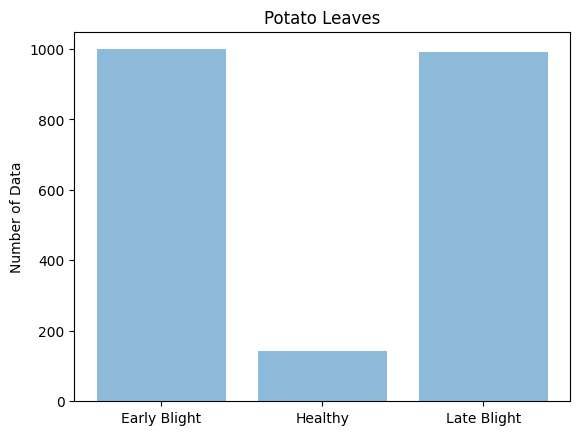

Early Blight:  999   Healthy:  142   Late Blight:  990


In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import os

objects = ('Early Blight', 'Healthy', 'Late Blight')
y_pos = np.arange(len(objects))
path, dirs, files = next(os.walk("/content/drive/MyDrive/Potato/Potato/Early Blight"))
file_count1 = len(files)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Potato/Potato/Healthy"))
file_count2 = len(files)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Potato/Potato/Late Blight"))
file_count3 = len(files)
performance = [file_count1,file_count2,file_count3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Data')
plt.title('Potato Leaves')

plt.show()
print("Early Blight: ", file_count1," ","Healthy: ", file_count2," ","Late Blight: ", file_count3)

In [13]:

IMAGE_SIZE = 224 
BATCH_SIZE = 64 

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory( 
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
)
val_generator = datagen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 1706 images belonging to 3 classes.
Found 425 images belonging to 3 classes.


In [14]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
    f.write(labels)

{'Early Blight': 0, 'Healthy': 1, 'Late Blight': 2}


In [15]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet'
)

In [16]:
base_model.trainable=False 
model = tf.keras.Sequential([ 
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(1024,activation='relu'),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(3, #no.of classes
                        activation='softmax')
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [18]:
epochs = 10 
history = model.fit(
    train_generator, 
    epochs = epochs, 
    validation_data=val_generator
)

Epoch 1/10
27/27 [==============================] - 396s 15s/step - loss: 1.0853 - accuracy: 0.6647 - val_loss: 0.2324 - val_accuracy: 0.9271
Epoch 2/10
27/27 [==============================] - 100s 4s/step - loss: 0.1500 - accuracy: 0.9400 - val_loss: 0.1042 - val_accuracy: 0.9624
Epoch 3/10
27/27 [==============================] - 100s 4s/step - loss: 0.1002 - accuracy: 0.9633 - val_loss: 0.0818 - val_accuracy: 0.9694
Epoch 4/10
27/27 [==============================] - 99s 4s/step - loss: 0.0637 - accuracy: 0.9767 - val_loss: 0.0988 - val_accuracy: 0.9694
Epoch 5/10
27/27 [==============================] - 100s 4s/step - loss: 0.0700 - accuracy: 0.9767 - val_loss: 0.1161 - val_accuracy: 0.9624
Epoch 6/10
27/27 [==============================] - 100s 4s/step - loss: 0.0661 - accuracy: 0.9783 - val_loss: 0.0911 - val_accuracy: 0.9647
Epoch 7/10
27/27 [==============================] - 100s 4s/step - loss: 0.0973 - accuracy: 0.9633 - val_loss: 0.0813 - val_accuracy: 0.9741
Epoch 8/10
27

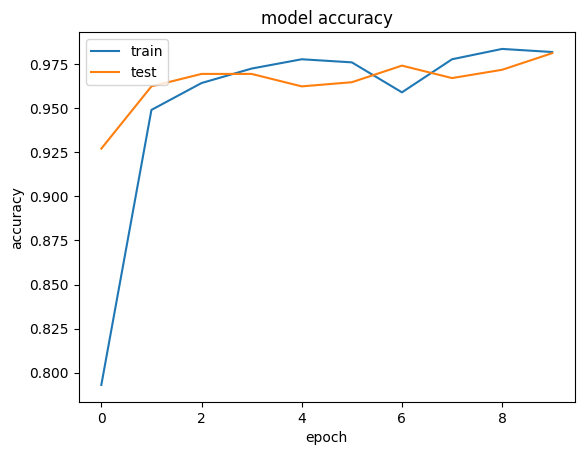

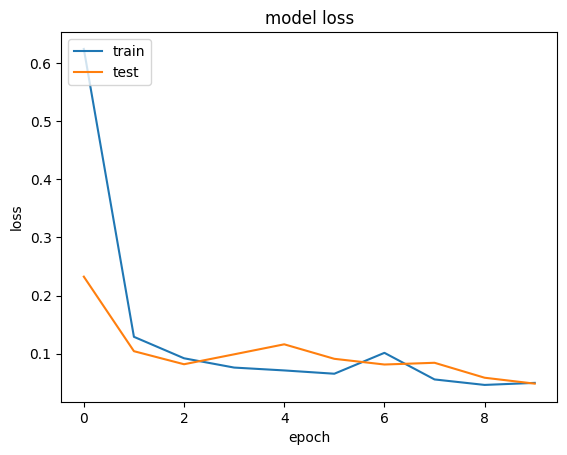

In [19]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
saved_model_dir = '' #means current directory
tf.saved_model.save(model, saved_model_dir) #saves to the current directory

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) 
tflite_model = converter.convert() #converts our model into a .tflite model which flutter uses for ondevice machine learning

with open('model.tflite', 'wb') as f: #to write the converted model into a file, written as binary so add 'wb' instead of 'w'
  f.write(tflite_model)
from google.colab import files
files.download('model.tflite')
files.download('labels.txt')

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>